In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset of Diabetes .csv to Dataset of Diabetes .csv


In [ ]:
df = pd.read_csv('Dataset of Diabetes .csv', encoding='latin1')

print(df.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [ ]:
df['Gender'] = df['Gender'].str.upper()


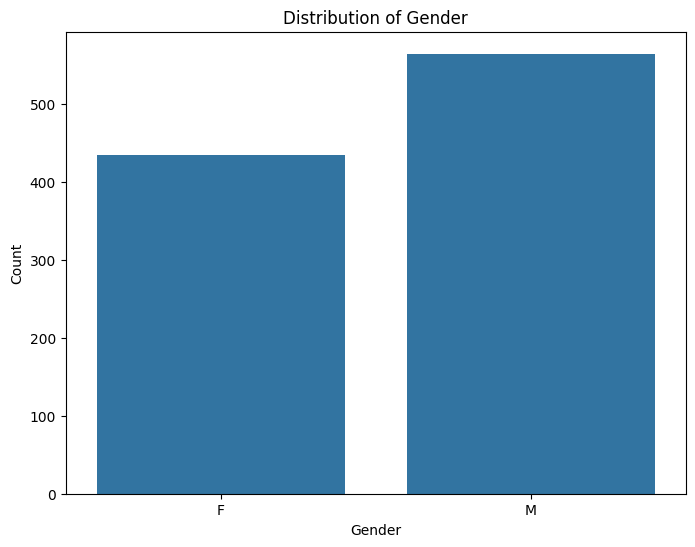

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<Figure size 800x600 with 0 Axes>

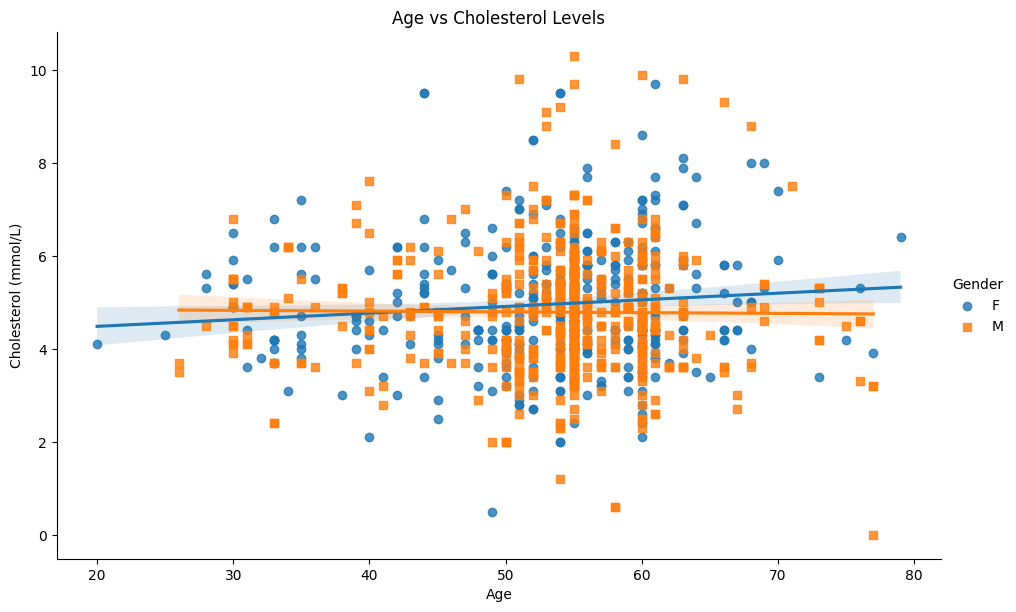

In [ ]:
plt.figure(figsize=(8, 6))
sns.lmplot(data=df, x='AGE', y='Chol', hue='Gender', markers=['o', 's'], aspect=1.6, height=6)
plt.title('Age vs Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mmol/L)')
plt.show()

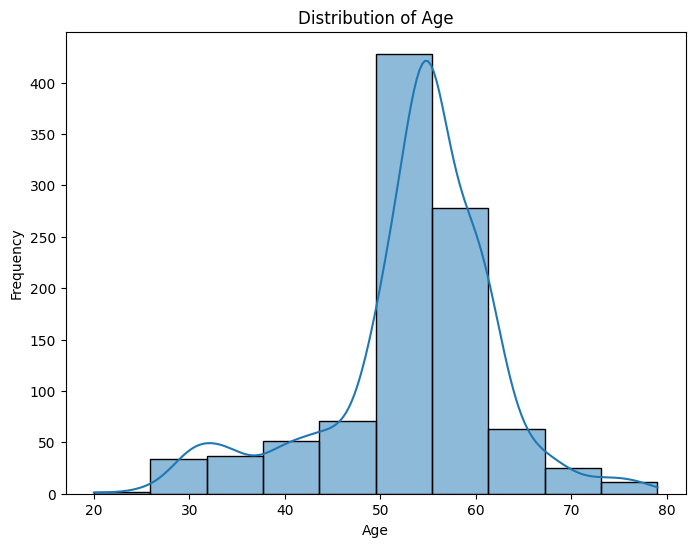

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', kde=True, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # 'F' -> 0, 'M' -> 1
df['CLASS'] = label_encoder.fit_transform(df['CLASS'])    # 'N' -> 0


In [ ]:
X = df[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]
y = df['CLASS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           2       1.00      1.00      1.00         6
           3       0.98      0.99      0.99       172
           4       0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.97      0.98      0.98       200



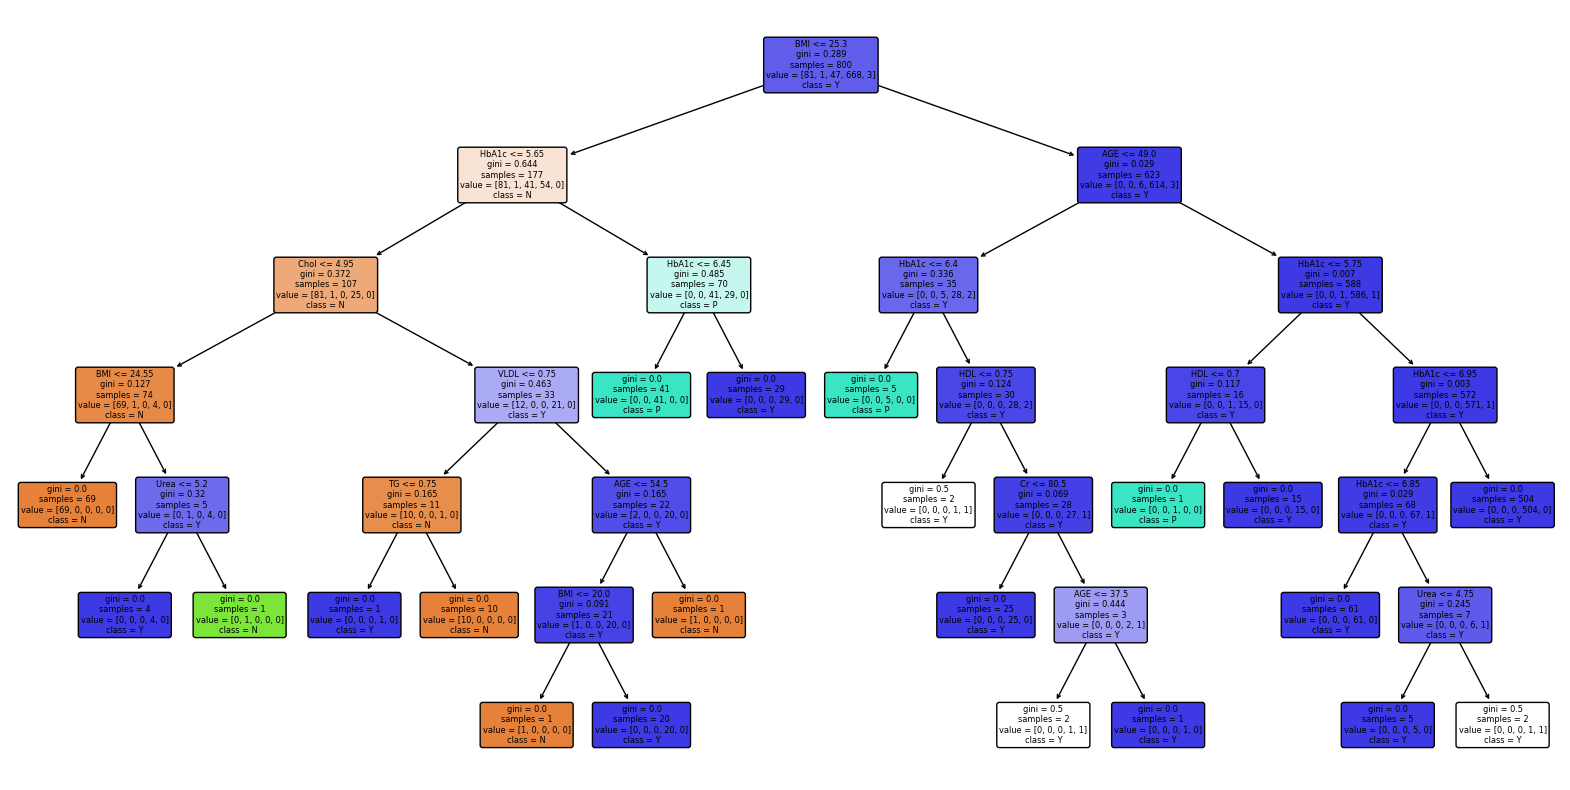

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('Classification Report:')
print(report_knn)

KNN Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           2       0.22      0.33      0.27         6
           3       0.97      0.97      0.97       172
           4       0.00      0.00      0.00         1

    accuracy                           0.90       200
   macro avg       0.45      0.47      0.46       200
weighted avg       0.90      0.90      0.90       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           2       1.00      1.00      1.00         6
           3       0.98      0.99      0.99       172
           4       0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.97      0.98      0.98       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (5).

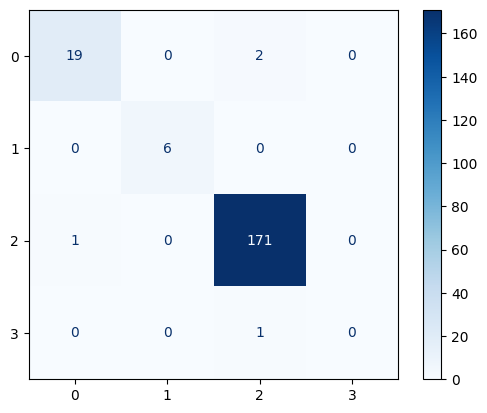

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           2       0.42      0.50      0.45        10
           3       0.97      0.98      0.97       253
           4       0.00      0.00      0.00         1

    accuracy                           0.93       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.93      0.93      0.93       300

Confusion Matrix:
 [[ 28   4   4   0]
 [  2   5   3   0]
 [  3   3 247   0]
 [  0   0   1   0]]


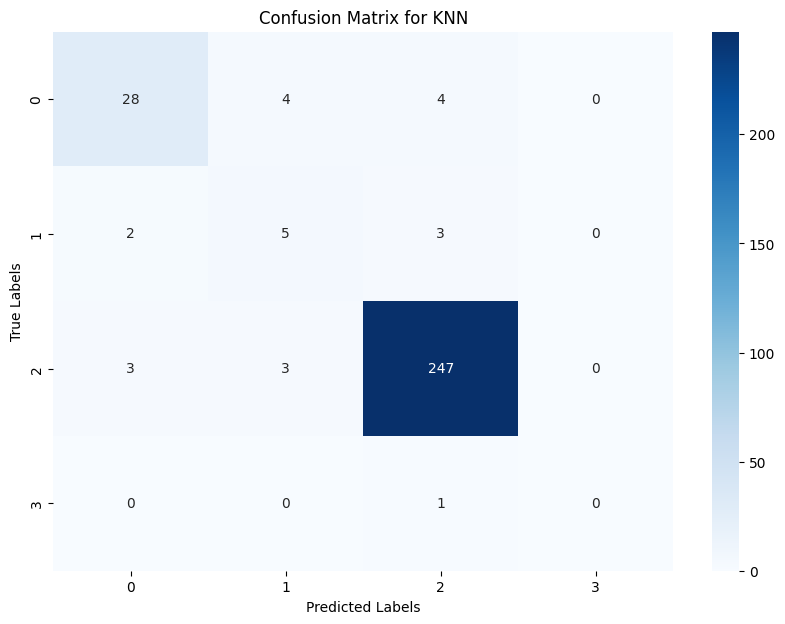

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


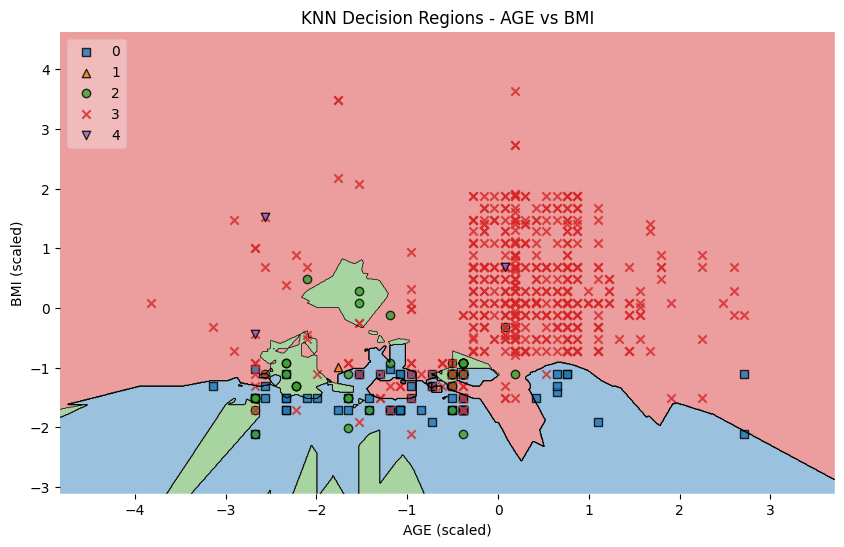

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'CLASS' is your target variable and it's categorical
X = df.drop(['ID', 'CLASS'], axis=1)
y = df['CLASS']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN classifier with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN')
plt.show()

# Plotting decision boundaries - only possible with 2 features
from mlxtend.plotting import plot_decision_regions
import numpy as np

# Using only two features for visualization: AGE and BMI
X = df[['AGE', 'BMI']].values
y = df['CLASS'].astype(int).values  # Converting to integer if not already

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Plotting decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train, clf=knn, legend=2)
plt.xlabel('AGE (scaled)')
plt.ylabel('BMI (scaled)')
plt.title('KNN Decision Regions - AGE vs BMI')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


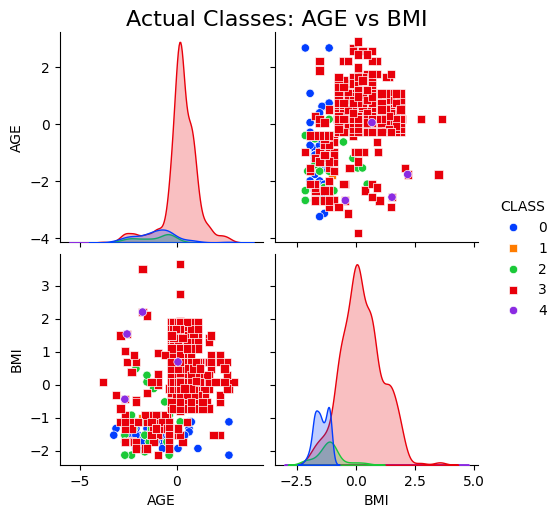

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


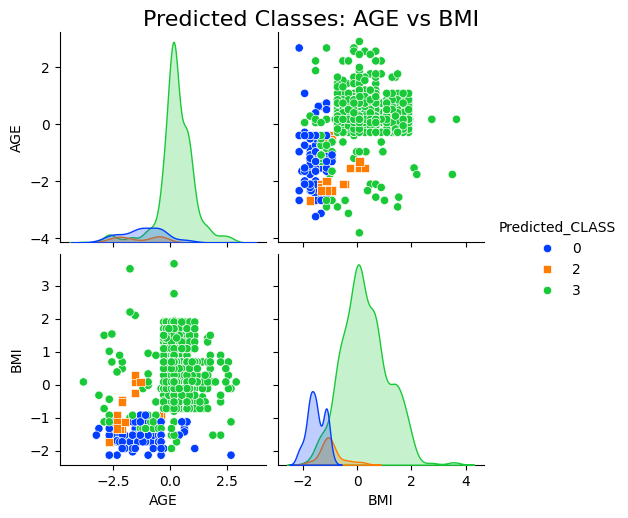

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Prepare the data
df_vis = df[['AGE', 'BMI', 'CLASS']].copy()  # Using two simple features for visualization
df_vis['CLASS'] = df['CLASS'].astype(int)  # Ensure class is integer if not already

# Feature scaling
scaler = StandardScaler()
features = ['AGE', 'BMI']
df_vis[features] = scaler.fit_transform(df_vis[features])

# Train KNN
X_train, X_test, y_train, y_test = train_test_split(df_vis[features], df_vis['CLASS'], test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the dataset
df_vis['Predicted_CLASS'] = knn.predict(df_vis[features])

# Create a pair plot
sns.pairplot(df_vis, vars=features, hue='CLASS', palette='bright', markers=["o", "s"])
plt.suptitle('Actual Classes: AGE vs BMI', size=16, y=1.02)
plt.show()

sns.pairplot(df_vis, vars=features, hue='Predicted_CLASS', palette='bright', markers=["o", "s"])
plt.suptitle('Predicted Classes: AGE vs BMI', size=16, y=1.02)
plt.show()


In [ ]:
df['CLASS'] = df['CLASS'].str.strip()

print("DataFrame after stripping spaces:")
print(df)

DataFrame after stripping spaces:
      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  

In [ ]:
df = df[df['CLASS'].isin(['N', 'Y'])]


In [ ]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})


In [ ]:
print(df['CLASS'].unique())

['N' 'Y']


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
102,435,34241,1,38,6.1,83,5.4,4.5,1.7,0.9,2.8,0.8,24.6,N
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,1,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


In [ ]:
# Splitting the dataset into training and testing sets
X = df.drop(['ID', 'No_Pation', 'CLASS'], axis=1)  # Features
y = df['CLASS']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_lr = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9421052631578948
Classification Report:
               precision    recall  f1-score   support

           N       0.91      0.50      0.65        20
           Y       0.94      0.99      0.97       170

    accuracy                           0.94       190
   macro avg       0.93      0.75      0.81       190
weighted avg       0.94      0.94      0.93       190



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9842105263157894
Classification Report:
               precision    recall  f1-score   support

           N       0.90      0.95      0.93        20
           Y       0.99      0.99      0.99       170

    accuracy                           0.98       190
   macro avg       0.95      0.97      0.96       190
weighted avg       0.98      0.98      0.98       190



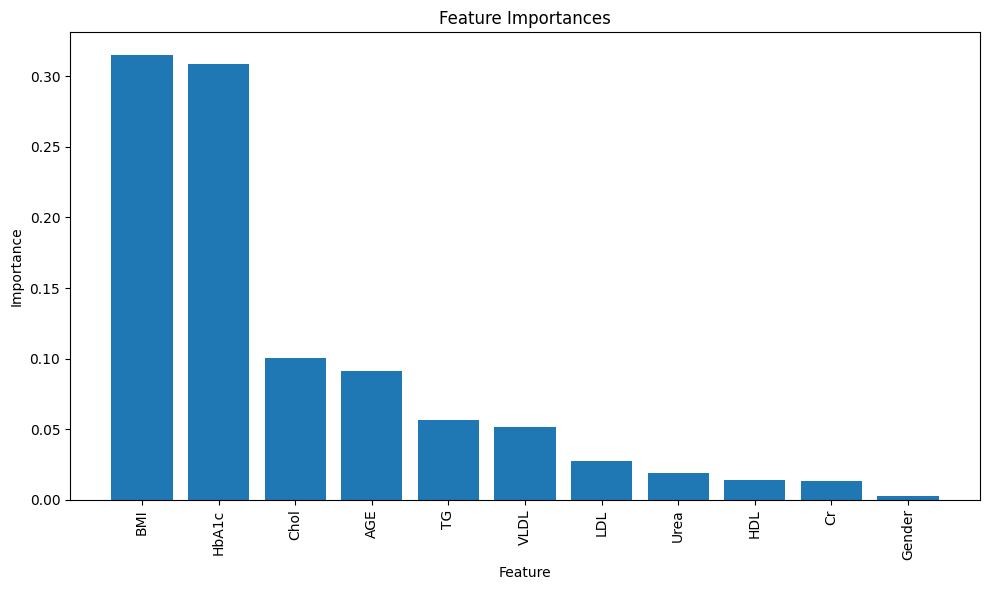

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



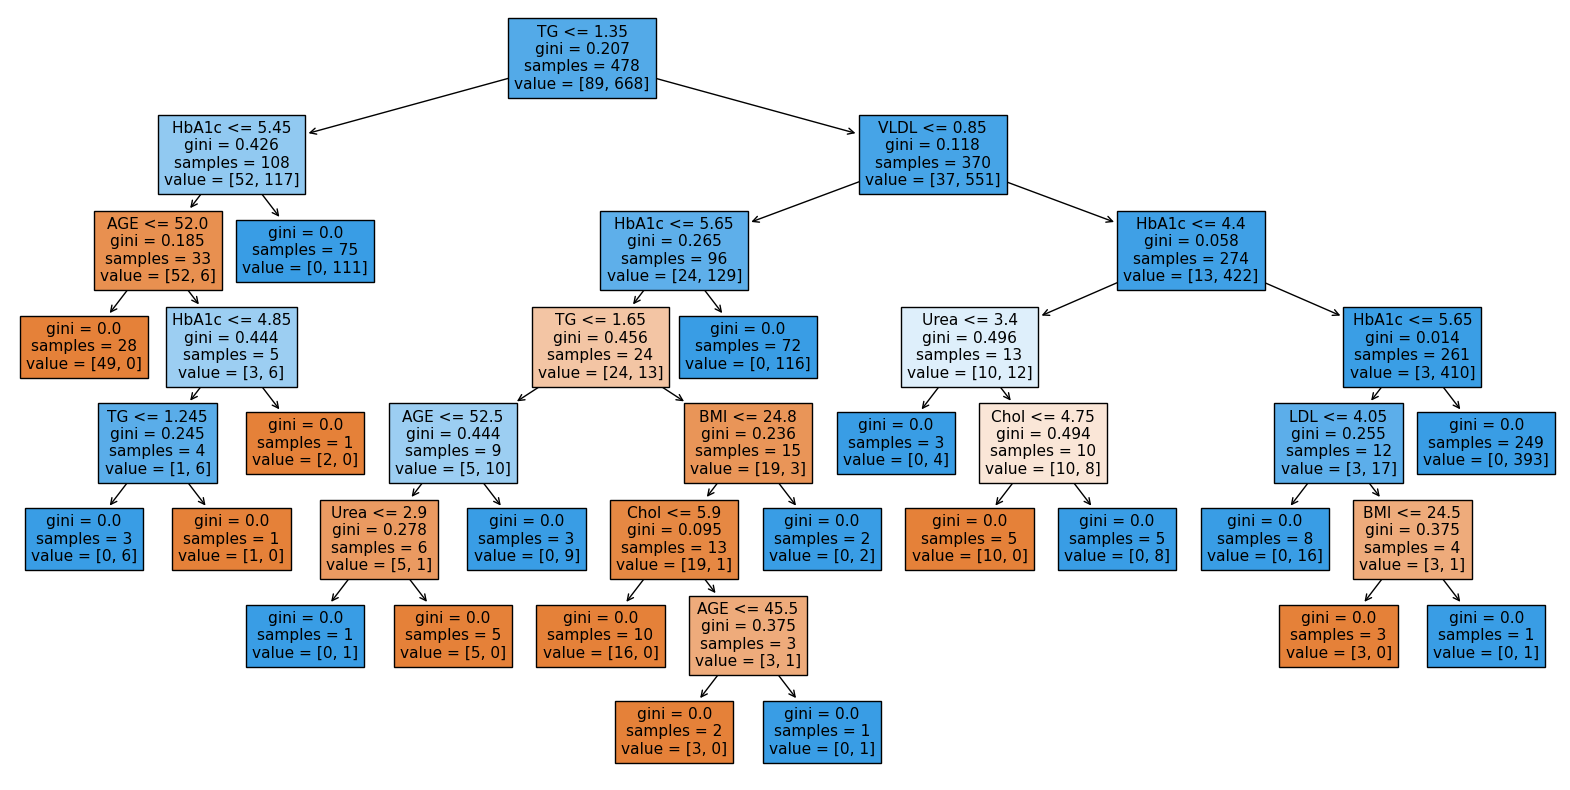

In [ ]:
from sklearn import tree

# Choose an estimator from the Random Forest (e.g., the first tree)
estimator = rf.estimators_[0]

# Plot the first tree
plt.figure(figsize=(20,10))
tree.plot_tree(estimator, feature_names=feature_names, filled=True)
plt.show()
